## Installations

In [93]:
#pip install Pillow
#pip install rembg

## Importing modules

In [94]:
#### Importing libraries
import requests
import numpy as np
from rembg import remove
from PIL import Image
from io import BytesIO

In [95]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

## Removing the background

In [96]:
def loading_removing_background(url):
    '''
    Tuned for GitHub URLs of image files. Converts into raw URL, imports
    image from raw URL, removes the background, returns processed image.
    '''
    raw_url = url + '?raw=true'
    page = requests.get(raw_url)
    input_image = Image.open(BytesIO(page.content))
    output_image = remove(input_image)
    output_image = cv2.cvtColor(np.array(output_image), cv2.COLOR_RGB2BGR)
    return output_image

In [104]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/orange.png'
output = loading_removing_background(url)
#output

In [108]:
output = output.reshape(output.shape[0] * output.shape[1], output.shape[2])

In [110]:
color_count = len(np.unique(output, axis=0))
color_count

195552

In [6]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [7]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [8]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [11]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0aaf5ed0>,
 [Text(-1.0864741440201509, 0.17197073697487136, '#000000'),
  Text(1.061107252847455, -0.2899161912596933, '#9c7916'),
  Text(1.0835448684510536, -0.1895534701697371, '#b7bcc2'),
  Text(1.0949991087191422, -0.10477094971548417, '#5d4407'),
  Text(1.0994391266179653, -0.03512273994900904, '#a08d6e')])

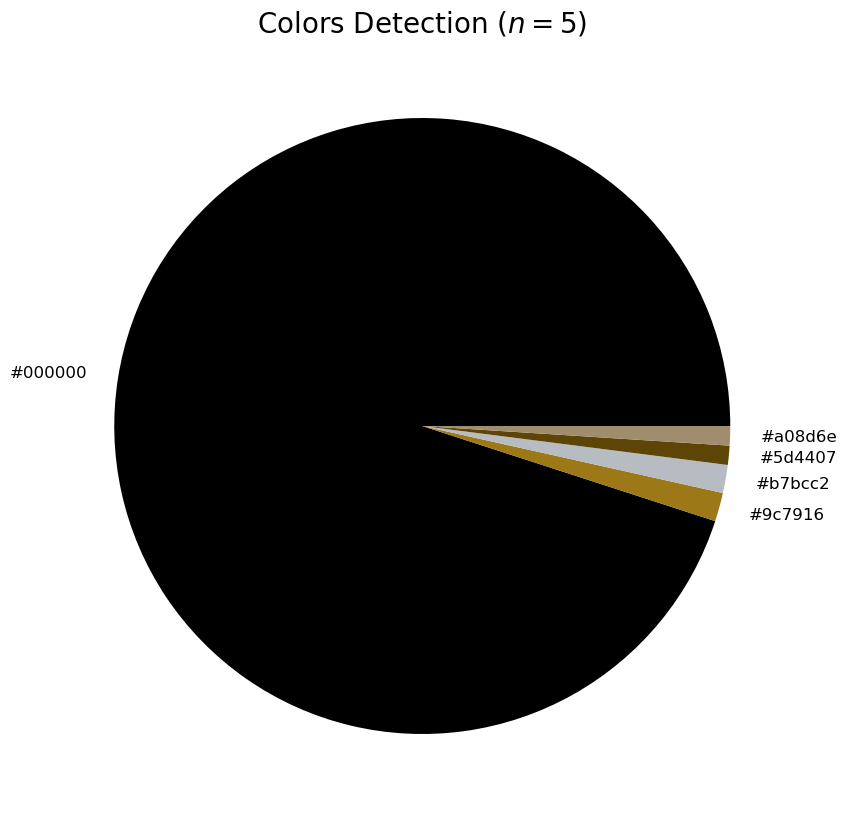

In [13]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

## 5 more mold images FOR FUN

In [14]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
output = loading_removing_background(url)
#output

In [15]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [16]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [17]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [18]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [20]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0a84e590>,
 [Text(-1.0864755286762988, 0.1719619887869326, '#000000'),
  Text(1.0611107653615397, -0.28990333498227927, '#9c7916'),
  Text(1.0835509424547118, -0.18951874605301186, '#5d4407'),
  Text(1.0950028830808587, -0.10473149499843618, '#b7bcc2'),
  Text(1.0994394119555881, -0.0351138069532591, '#a08d6e')])

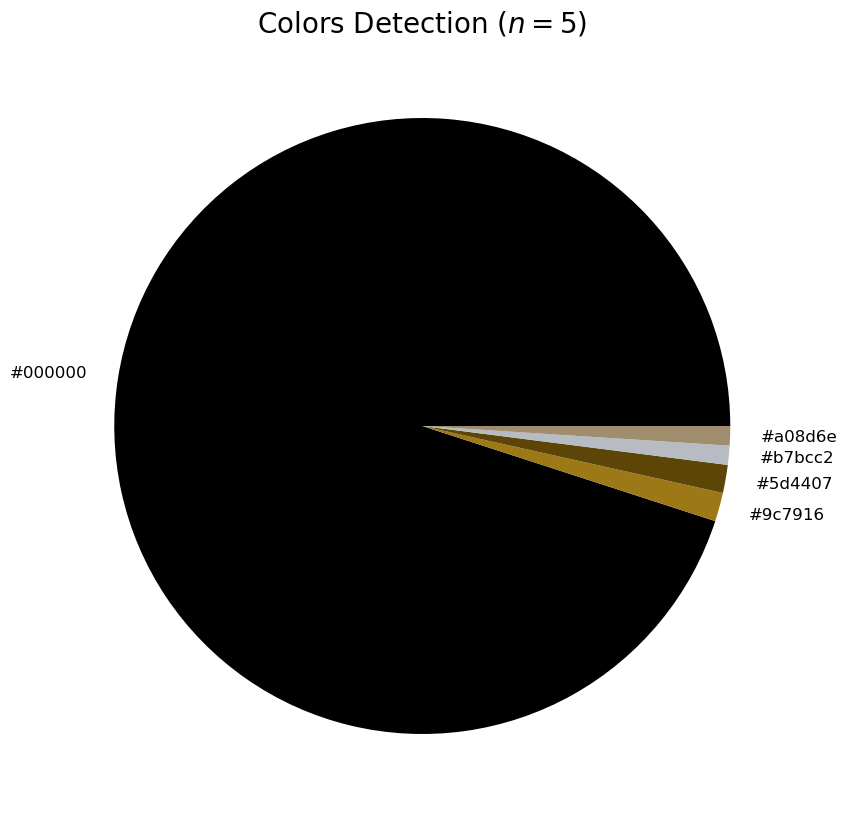

In [22]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [23]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/more_mold_1.png'
output = loading_removing_background(url)
#output

In [24]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [25]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [26]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [27]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [28]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [29]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0ab69950>,
 [Text(0.11245416747985791, 1.0942367477910857, '#e5e7af'),
  Text(-1.0639226000278834, -0.2794077685926229, '#020201'),
  Text(-0.6088164215404436, -0.9161564085147739, '#a18c51'),
  Text(0.12214962395538599, -1.0931969032921554, '#a8b5a3'),
  Text(0.9579895454890489, -0.5406070946016946, '#4a371a')])

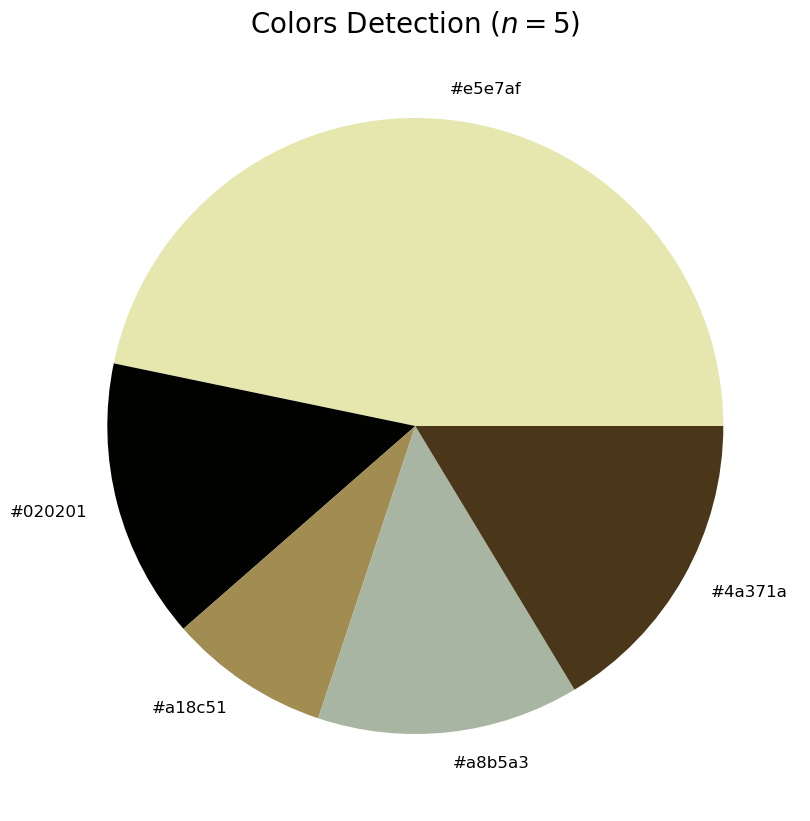

In [31]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [32]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/more_mold_2.png'
output = loading_removing_background(url)
#output

In [33]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [34]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [35]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [36]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [37]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [38]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0abc7bd0>,
 [Text(-0.3733986790681121, 1.0346851822995191, '#5e5f37'),
  Text(-0.6267631170646629, -0.9039734482203489, '#c14916'),
  Text(0.067525434889133, -1.0979254599666746, '#858e60'),
  Text(0.6619877421678003, -0.8785056796740578, '#bfb49c'),
  Text(1.026257381576392, -0.39597447740980446, '#000000')])

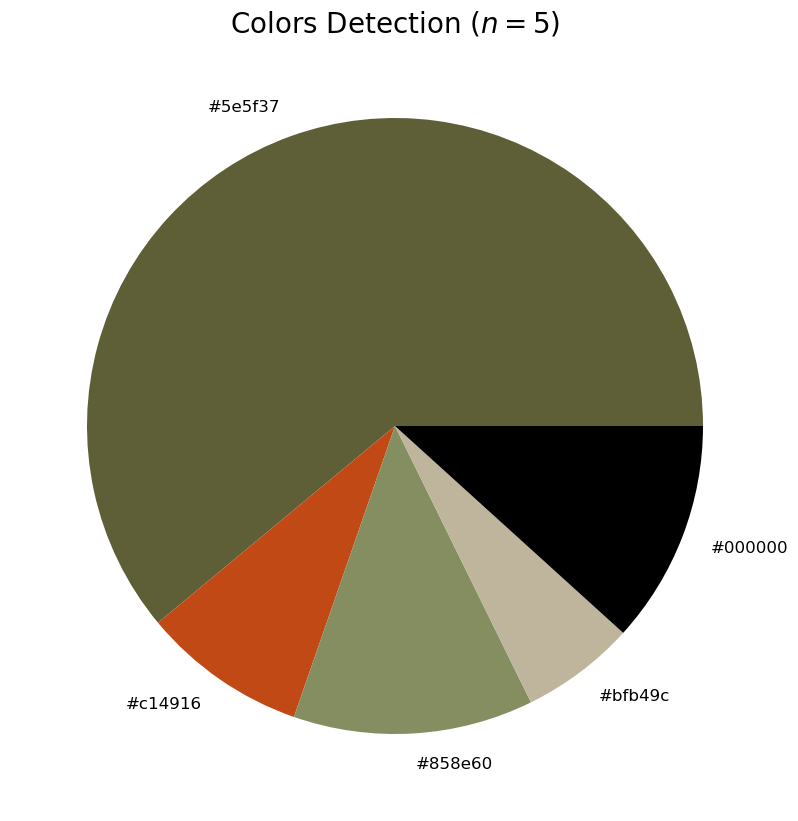

In [40]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [41]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/more_mold_3.png'
output = loading_removing_background(url)
#output

In [42]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [43]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [44]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [45]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [46]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [47]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0b36ffd0>,
 [Text(0.004141401287153999, 1.0999922039702732, '#000000'),
  Text(-1.0128109426847196, -0.42920157779077384, '#cd8728'),
  Text(-0.49470472059160026, -0.9824801470891852, '#d6c8c4'),
  Text(0.2773534568322643, -1.0644599851488985, '#5c454f'),
  Text(0.9929449046525777, -0.4733502047369197, '#848b98')])

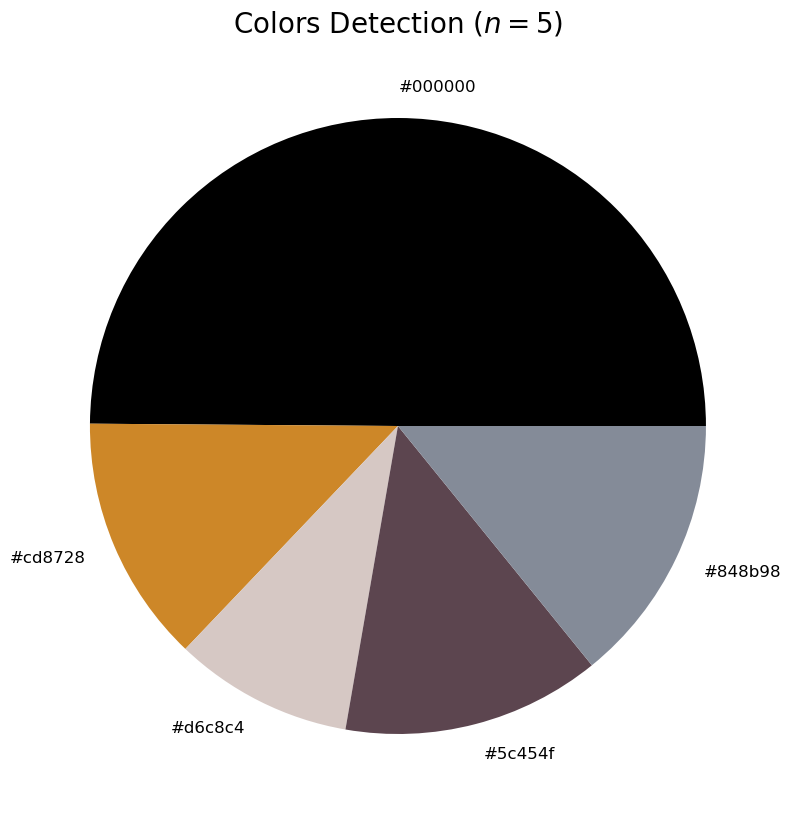

In [49]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [50]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/more_mold_4.png'
output = loading_removing_background(url)
#output

In [51]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [52]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [53]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [54]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [55]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [68]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [69]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0d563610>,
 [Text(-0.39154801441026615, 1.0279543532722542, '#000000'),
  Text(-0.7732034377129308, -0.7824042714025187, '#d2930c'),
  Text(-0.6279602309527396, -0.9031422636228371, '#a7b199'),
  Text(-0.3556028941535915, -1.0409354358794736, '#614d2e'),
  Text(0.0014930373485843168, -1.0999989867447495, '#d8ad4b'),
  Text(0.34637026181663466, -1.0440438887944683, '#b39b6a'),
  Text(0.6473399693764453, -0.8893542399110171, '#aa7f32'),
  Text(0.8647611581549791, -0.6798442022599437, '#d3bc8c'),
  Text(1.0083615298177213, -0.43955321086719984, '#81856a'),
  Text(1.0891807384262184, -0.15390035425988421, '#dad4bf')])

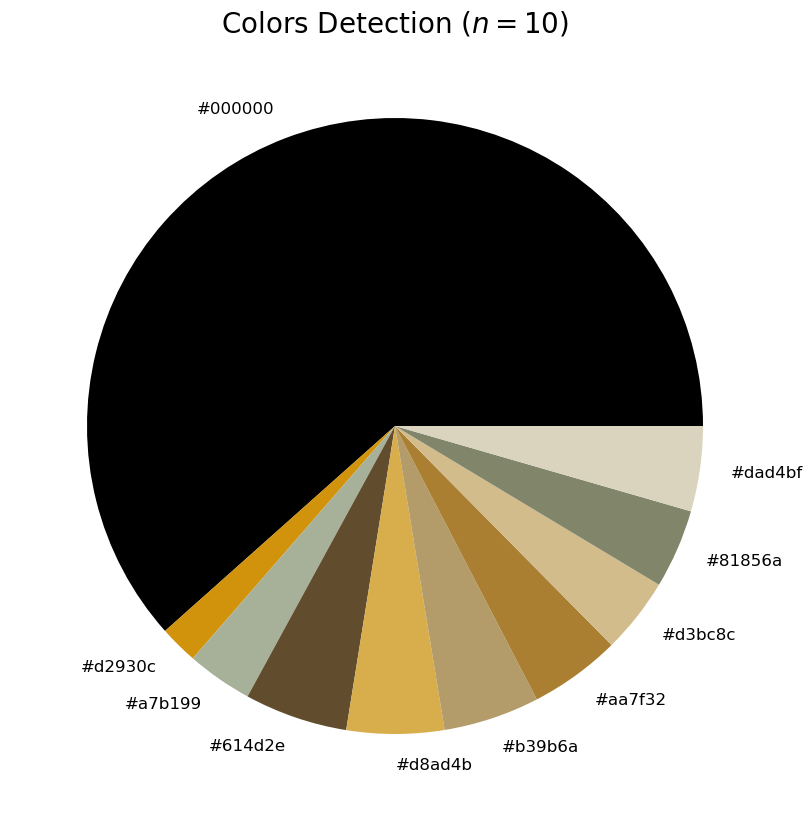

In [70]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [71]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/more_mold_5.png'
output = loading_removing_background(url)
#output

In [72]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

## HEX color labeling

In [80]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [81]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [82]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [83]:
# Loading the image
image = get_image()
#image = output

## Clustering the colors

In [90]:
number_of_colors = 6
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x28c0b394390>,
 [Text(-0.3993113347176121, 1.0249636373872195, '#000000'),
  Text(-0.6735233553193166, -0.8696932159327274, '#d4ccaf'),
  Text(-0.22807686685358597, -1.0760952294319737, '#cba75c'),
  Text(0.3616021970675705, -1.03886661852035, '#7f6c42'),
  Text(0.8414478729218675, -0.7084952202769365, '#c98f17'),
  Text(1.0750973368522596, -0.23273529232408938, '#a3a485')])

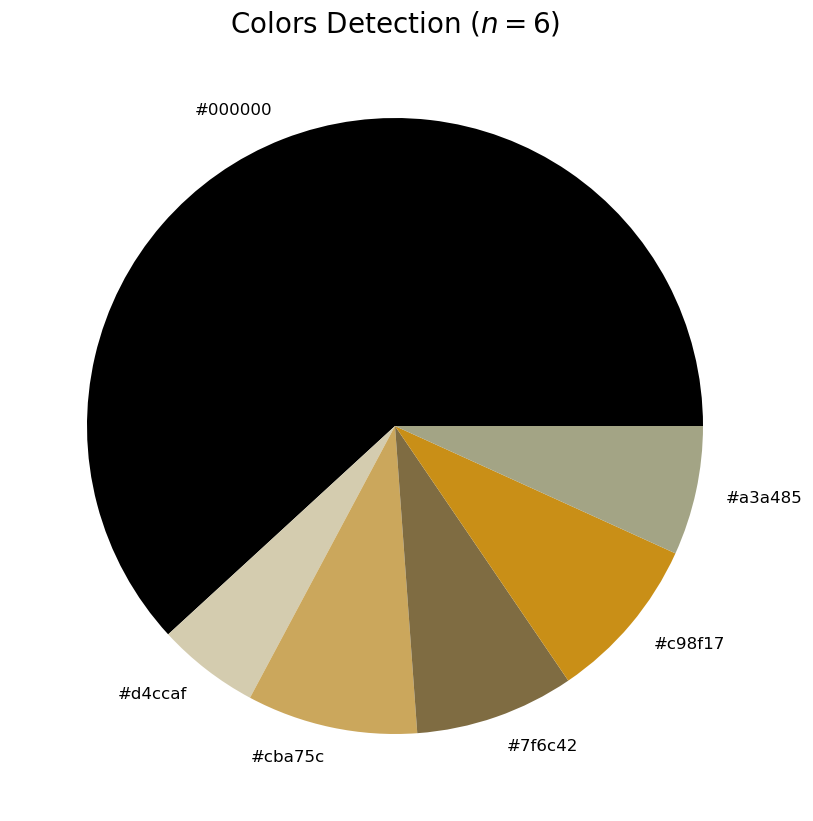

In [92]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)